<a href="https://colab.research.google.com/github/willians124/ML/blob/master/Parcial_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0.-Importamos las librerías a usar**

In [0]:
!pip install lightgbm

In [0]:

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [0]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import gc
import lightgbm as lgb

from scipy import sparse
from scipy.sparse.linalg import svds

from sklearn.metrics import roc_auc_score

from scipy.sparse import csr_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# **1.Leer los datos del dataset**
## Leer los datos del dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datos = pd.read_excel("/content/drive/My Drive/2019-2/2.INTELIGENCIA ARTIFICIAL/IA 2019 2 GRUPAL/PARCIAL/ae1.dataset.xls")

In [0]:
datos.head(3)

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,PeorHabito Pago,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
0,514,35,1703.0,M,S,N,AREQUIPA,74.13,0,NaN,NaN,2100,0,2,2331,131,2461,1,1,1,1,1,1,9,4,0.0,N/V,No Registró,0.0,0,0,0,0,0,0.0,0,0,0,133.20,8.0,66.00,MALO
1,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,NaN,1100,0,9,0,1405,1405,A,B,A,4,B,B,A,4,0.0,Ref.C,Registró Refinanciación,82.0,0,18,49,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
2,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,NaN,600,0,7,0,2700,2700,B,A,B,A,4,1,4,1,0.0,Ref.C,Registró Refinanciación,0.0,16,44,16,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO


# Identifique número de filas y columnas

In [0]:
datos.shape

(7100, 42)

# Extraiga una lista de los atributos.

In [0]:
print('Estructura de los datos')
for col in datos.columns :
  print(col, type(datos[col][0]))

Estructura de los datos
Cliente <class 'numpy.int64'>
Edad <class 'numpy.int64'>
Renta <class 'numpy.float64'>
Sexo <class 'str'>
EstadoCivil <class 'str'>
NivelSocioEconomico <class 'str'>
Departamento <class 'str'>
AntiguedadCuenta_Meses <class 'str'>
RegistraAdicionales <class 'numpy.int64'>
NumeroAdicionales <class 'numpy.float64'>
AntiguedadAdicionales_Meses <class 'float'>
LineaCreditoNormal <class 'numpy.int64'>
SituacionCuenta <class 'numpy.int64'>
PromediodePagos <class 'str'>
SaldoExtra <class 'numpy.int64'>
SaldoNormal <class 'numpy.int64'>
SaldoTotal <class 'numpy.int64'>
HabitodePago1 <class 'str'>
HabitodePago2 <class 'str'>
HabitodePago3 <class 'str'>
HabitodePago4 <class 'str'>
HabitodePago5 <class 'str'>
HabitodePago6 <class 'str'>
HabitodePago7 <class 'str'>
HabitodePago8 <class 'str'>
PeorHabito Pago <class 'numpy.float64'>
FlagRefinanciadoHistórico <class 'str'>
FlagRefinanciado <class 'str'>
DiasMora200812 <class 'numpy.float64'>
DiasMora200901 <class 'numpy.int64'

# **2.Frecuencia Incial**
Determinar la frecuencia de BUENOS y MALOS en los datos, de tal forma que se puede armar muestras. Calcule el nivel de entropía e interprete los resultados.

In [0]:
pd.value_counts(datos['Flag_Cliente'])

MALO     3550
BUENO    3550
Name: Flag_Cliente, dtype: int64

In [0]:
100 * datos['Flag_Cliente'].value_counts() / len(datos['Flag_Cliente'])

MALO     50.0
BUENO    50.0
Name: Flag_Cliente, dtype: float64

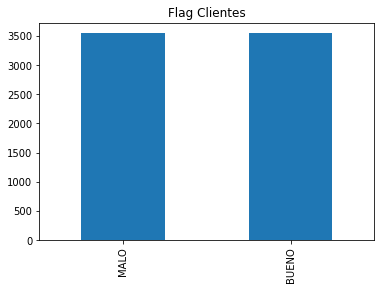

In [0]:
plot = datos['Flag_Cliente'].value_counts().plot(kind='bar',
                                            title='Flag Clientes')

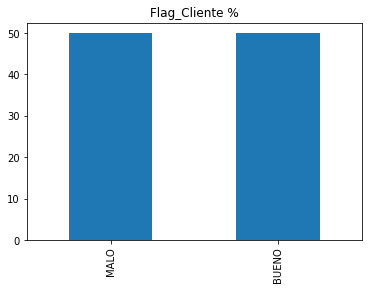

In [0]:
plot = (100 * datos['Flag_Cliente'].value_counts() / len(datos['Flag_Cliente'])).plot(
kind='bar', title='Flag_Cliente %')

In [0]:
columns_string_a_float=['AntiguedadCuenta_Meses','CompraAnual_200806_200905','CompraMensualMaxima_200806_200905','AntiguedadAdicionales_Meses']
for columns in columns_string_a_float:   
  datos_AntiguedadCuenta_Meses=datos[columns]
  float_replace=[]
  for i in datos_AntiguedadCuenta_Meses:
    float_replace.append(str(i).replace(",","."))
  float_dato = pd.DataFrame(float_replace)
  float_dato=float_dato.astype(float)
  float_dato=float_dato.set_index(datos.index)
  float_dato=float_dato.rename(columns={0: columns})
  datos[columns]=float_dato
  datos[columns].head()

# **3.Muestreo Inicial**
Dividir los datos en dos grupos del 50% y 50% respectivamente, al que se denominara TRAIN y TEST.

In [0]:
Train,Test = train_test_split(datos, test_size=0.5, train_size=0.5,random_state=1982)

# **4.Balanceo de Datos**
Balancear los datos. Solo con los datos de TEST, maximize el tamaño de la muestra balanceada.

Solo se balancea el TRAIN y el TEST se deja igual.


In [0]:
Train.shape , Test.shape

((3550, 42), (3550, 42))

In [0]:
pd.value_counts(Train['Flag_Cliente']),pd.value_counts(Test['Flag_Cliente'])

(MALO     1778
 BUENO    1772
 Name: Flag_Cliente, dtype: int64, BUENO    1778
 MALO     1772
 Name: Flag_Cliente, dtype: int64)

In [0]:
pd.value_counts(Train['Flag_Cliente'])

MALO     1778
BUENO    1772
Name: Flag_Cliente, dtype: int64

In [0]:
Train_Malo_undersampling=Train_Malo=Train.loc[Train.loc[:,'Flag_Cliente']=='MALO'].sample(n=1772, replace=False)
Train_Malo_undersampling.shape

(1772, 42)

In [0]:
frames = [Train_Malo_undersampling,Train.loc[Train.loc[:,'Flag_Cliente']=='BUENO']]
Train_Balanceado =pd.concat(frames)

In [0]:
pd.value_counts(Train_Balanceado['Flag_Cliente'])

MALO     1772
BUENO    1772
Name: Flag_Cliente, dtype: int64

In [0]:
#plot = Train_Balanceado['Flag_Cliente'].value_counts().plot(kind='bar',
                                          #  title='Flag Clientes')

In [0]:
index_Cliente_Train   = Train_Balanceado['Cliente'].values
index_Cliente_Test    = Test['Cliente'].values

In [0]:
DataSet_Nuevo=pd.concat([Train_Balanceado, Test])

In [0]:
DataSet_Nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7094 entries, 2601 to 3245
Data columns (total 42 columns):
Cliente                                7094 non-null int64
Edad                                   7094 non-null int64
Renta                                  3557 non-null float64
Sexo                                   7094 non-null object
EstadoCivil                            7094 non-null object
NivelSocioEconomico                    7094 non-null object
Departamento                           7094 non-null object
AntiguedadCuenta_Meses                 7094 non-null float64
RegistraAdicionales                    7094 non-null int64
NumeroAdicionales                      2360 non-null float64
AntiguedadAdicionales_Meses            2360 non-null float64
LineaCreditoNormal                     7094 non-null int64
SituacionCuenta                        7094 non-null int64
PromediodePagos                        7094 non-null object
SaldoExtra                             7094 non-nul

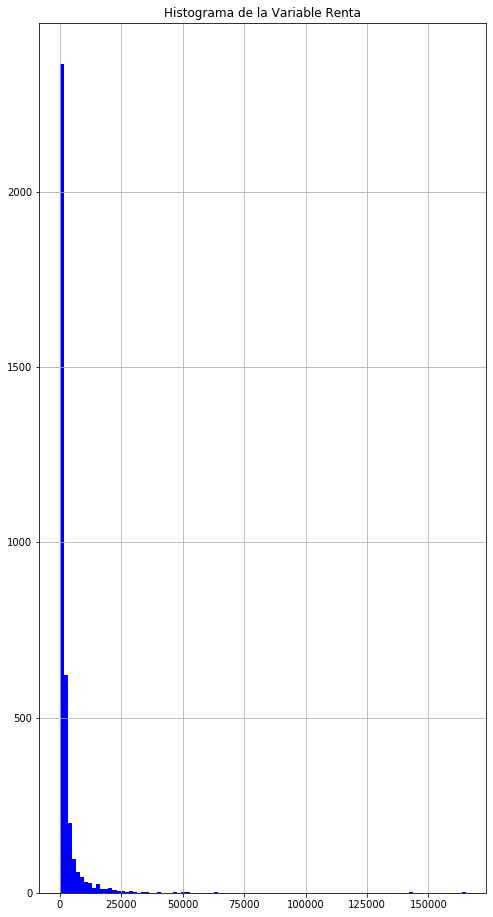

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable Renta')
DataSet_Nuevo['Renta'].hist(figsize=(8,16),color="blue",bins=100)

Remplazo de datos

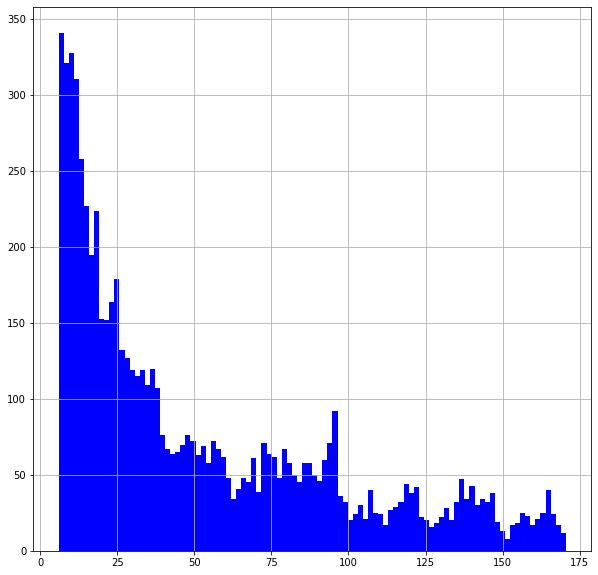

In [0]:
DataSet_Nuevo['AntiguedadCuenta_Meses'].hist(figsize=(10,10),color="blue",bins=100)

In [0]:
pd.value_counts(DataSet_Nuevo[DataSet_Nuevo.columns[9]],dropna=False)

NaN    4734
1.0    1868
2.0     344
3.0     146
4.0       2
Name: NumeroAdicionales, dtype: int64

In [0]:
DataSet_Nuevo = DataSet_Nuevo.drop(['PeorHabito Pago'], axis=1) 

In [0]:
#imputación no parámetrica 
data_parametrica=DataSet_Nuevo
index_cliente=data_parametrica.Cliente
data_parametrica = data_parametrica.drop('Cliente', axis=1)
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (data_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Edad                                      0
Renta                                  3537
Sexo                                      0
EstadoCivil                               0
NivelSocioEconomico                       0
Departamento                              0
AntiguedadCuenta_Meses                    0
RegistraAdicionales                       0
NumeroAdicionales                      4734
AntiguedadAdicionales_Meses            4734
LineaCreditoNormal                        0
SituacionCuenta                           0
PromediodePagos                           0
SaldoExtra                                0
SaldoNormal                               0
SaldoTotal                                0
HabitodePago1                             0
HabitodePago2                             0
HabitodePago3                             0
HabitodePago4                             1
HabitodePago5                            14
HabitodePago6                           169
Hab

In [0]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
data_parametrica['Sexo'] = data_parametrica['Sexo'].replace({'M': 1, 'F': 2})
data_parametrica['EstadoCivil'] = data_parametrica['EstadoCivil'].replace({'S': 1, 'C': 2,'D': 3, 'V': 4})
data_parametrica['NivelSocioEconomico'] = data_parametrica['NivelSocioEconomico'].replace({'C': 1, 'N': 2,'D': 3, 'A': 4,'B': 5})
data_parametrica['Departamento'] = data_parametrica['Departamento'].replace({'LIMA': 1, 'PIURA': 2,'LA LIBERTAD': 3, 'LAMBAYEQUE': 4,'AREQUIPA': 5,'ICA': 6, 'CAJAMARCA': 7,'ANCASH': 8,'JUNIN': 9})
data_parametrica['PromediodePagos'] = data_parametrica['PromediodePagos'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago1'] = data_parametrica['HabitodePago1'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago2'] = data_parametrica['HabitodePago2'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago3'] = data_parametrica['HabitodePago3'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago4'] = data_parametrica['HabitodePago4'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago5'] = data_parametrica['HabitodePago5'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago6'] = data_parametrica['HabitodePago6'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago7'] = data_parametrica['HabitodePago7'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['HabitodePago8'] = data_parametrica['HabitodePago8'].replace({'0': 0,'1': 1, '2': 2,'3': 3, '4': 4,'5': 5,'6': 6, '7': 7,'8': 8,'9': 9,'A': 10, 'B': 11,'C': 12,'D': 13})
data_parametrica['FlagRefinanciadoHistórico'] = data_parametrica['FlagRefinanciadoHistórico'].replace({'N/V': 0,'Ref.C': 1,'Ref.D': 2})
data_parametrica['FlagRefinanciado'] = data_parametrica['FlagRefinanciado'].replace({'No Registró': 0,'Registró Refinanciación': 1})
data_parametrica['CódigoInstitucion'] =data_parametrica['CódigoInstitucion'].fillna(2)
data_parametrica['CódigoInstitucion'] = data_parametrica['CódigoInstitucion'].replace(
{0.0  :0 , 400.0:1 , 300.0:3 , 951.0:4 , 956.0:5 , 955.0:6 , 952.0:7 , 401.0:8 , 957.0:9 , 302.0:10 , 953.0:11})
data_parametrica['Flag_Cliente'] = data_parametrica['Flag_Cliente'].replace({'MALO': 0,'BUENO': 1})

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer
column_para_imputar = ['Renta','NumeroAdicionales','AntiguedadAdicionales_Meses','HabitodePago4','HabitodePago5','HabitodePago6',
               'HabitodePago7','HabitodePago8','DiasMora200812','CódigoInstitucion','CompraAnual_200806_200905','NroTransaccionesAnual_200806_200905',
               'CompraMensualMaxima_200806_200905']

for columns in column_para_imputar:
  if(type(data_parametrica[columns][0])==np.dtype('int64')):
    mode=data_parametrica[columns].mode()
    nulls = data_parametrica[data_parametrica[columns].isnull()]
    for ni in nulls.index:
      data_parametrica.loc[ni, columns] = mode
  if(type(data_parametrica[columns][0])==np.dtype('float64')):
    mean=data_parametrica[columns].mean()
    nulls = data_parametrica[data_parametrica[columns].isnull()]
    for ni in nulls.index:
      data_parametrica.loc[ni, columns] = mean

In [0]:
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (data_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Edad                                   0
Renta                                  0
Sexo                                   0
EstadoCivil                            0
NivelSocioEconomico                    0
Departamento                           0
AntiguedadCuenta_Meses                 0
RegistraAdicionales                    0
NumeroAdicionales                      0
AntiguedadAdicionales_Meses            0
LineaCreditoNormal                     0
SituacionCuenta                        0
PromediodePagos                        0
SaldoExtra                             0
SaldoNormal                            0
SaldoTotal                             0
HabitodePago1                          0
HabitodePago2                          0
HabitodePago3                          0
HabitodePago4                          0
HabitodePago5                          0
HabitodePago6                          0
HabitodePago7                          0
HabitodePago8               

In [0]:
df=data_parametrica
tipos = df.columns.to_series().groupby(df.dtypes).groups
for columnas_a_dumear in tipos[np.dtype('int64')]:
  frames =[df,pd.get_dummies(df[columnas_a_dumear])]
  df=pd.concat(frames,axis=1)
df.head(3)

,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente,...,46,51,56,62,67,72,77,82,87,92,95,100,105,110,115,121,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,0,1,2,3,4,0,1
2601,22,2534.16587,2,1,2,4,13.03,0,1.272034,25.059081,1300,5,5,0,1973,1973,10,4,1,1.0,11.0,10.0,4.0,1.0,1,1,56.000000,0,0,0,25,56,0.0,0,0,1,2125.63,40.0,587.76,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
841,25,2534.16587,1,1,1,1,51.17,0,1.272034,25.059081,800,5,5,0,791,791,11,10,4,2.0,1.0,2.0,1.0,1.0,0,0,5.634037,1,0,31,31,1,0.0,0,0,3,2484.22,35.0,726.60,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
427,56,2534.16587,1,2,4,1,103.93,0,1.272034,25.059081,12000,5,8,5952,6905,12857,12,11,11,10.0,4.0,2.0,2.0,2.0,0,0,1.000000,32,29,60,31,62,0.0,1,0,0,5921.56,27.0,1898.39,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
tipos[np.dtype('int64')]

Index(['Edad', 'Sexo', 'EstadoCivil', 'NivelSocioEconomico', 'Departamento',
       'RegistraAdicionales', 'LineaCreditoNormal', 'SituacionCuenta',
       'PromediodePagos', 'SaldoExtra', 'SaldoNormal', 'SaldoTotal',
       'HabitodePago1', 'HabitodePago2', 'HabitodePago3',
       'FlagRefinanciadoHistórico', 'FlagRefinanciado', 'DiasMora200901',
       'DiasMora200902', 'DiasMora200903', 'DiasMora200904', 'DiasMora200905',
       'PagaDespues', 'DispEfectivo', 'CalificacionSBS', 'Flag_Cliente'],
      dtype='object')

In [0]:
categ=['Edad', 'Sexo', 'EstadoCivil', 'NivelSocioEconomico', 'Departamento',
       'RegistraAdicionales', 'LineaCreditoNormal', 'SituacionCuenta',
       'PromediodePagos', 'SaldoExtra', 'SaldoNormal', 'SaldoTotal',
       'HabitodePago1', 'HabitodePago2', 'HabitodePago3',
       'FlagRefinanciadoHistórico', 'FlagRefinanciado', 'DiasMora200901',
       'DiasMora200902', 'DiasMora200903', 'DiasMora200904', 'DiasMora200905',
       'PagaDespues', 'DispEfectivo', 'CalificacionSBS', 'Flag_Cliente']

In [0]:
#index_cliente.index=index_cliente.reset_index(drop=True).index
frames =[data_parametrica,index_cliente]
Data_completo=pd.concat(frames,axis=1)

In [0]:
Data_completo=Data_completo.reset_index(drop=True)

In [0]:
Data_completo.index=Data_completo['Cliente']

In [0]:
Data_completo.head()

,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente,Cliente
Cliente,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2101491,22,2534.16587,2,1,2,4,13.03,0,1.272034,25.059081,1300,5,5,0,1973,1973,10,4,1,1.0,11.0,10.000000,4.000000,1.00000,1,1,56.000000,0,0,0,25,56,0.0,0,0,1,2125.63,40.0,587.76,0,2101491
1008870,25,2534.16587,1,1,1,1,51.17,0,1.272034,25.059081,800,5,5,0,791,791,11,10,4,2.0,1.0,2.000000,1.000000,1.00000,0,0,5.634037,1,0,31,31,1,0.0,0,0,3,2484.22,35.0,726.60,0,1008870
500608,56,2534.16587,1,2,4,1,103.93,0,1.272034,25.059081,12000,5,8,5952,6905,12857,12,11,11,10.0,4.0,2.000000,2.000000,2.00000,0,0,1.000000,32,29,60,31,62,0.0,1,0,0,5921.56,27.0,1898.39,0,500608
2145212,43,2534.16587,2,1,2,3,11.33,0,1.272034,25.059081,800,0,8,0,207,207,10,10,10,11.0,10.0,10.000000,4.000000,1.00000,0,0,31.000000,1,29,1,31,0,0.0,0,0,2,972.48,11.0,608.87,0,2145212
2288182,22,2534.16587,1,1,3,1,6.20,0,1.272034,25.059081,500,5,9,0,306,306,11,10,4,0.0,0.0,3.691119,3.326789,2.96929,0,0,5.634037,0,0,21,51,21,0.0,0,0,2,395.25,13.0,182.02,0,2288182


In [0]:

for i in range(len(index_Cliente_Train)):
   if (i==0):
     Train_final=Data_completo[Data_completo['Cliente']==index_Cliente_Train[i]]
   else:
      Train_final=pd.concat([Train_final,Data_completo[Data_completo['Cliente']==index_Cliente_Train[i]]])

In [0]:
Train_final.head()

,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente,Cliente
Cliente,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2101491,22,2534.16587,2,1,2,4,13.03,0,1.272034,25.059081,1300,5,5,0,1973,1973,10,4,1,1.0,11.0,10.000000,4.000000,1.00000,1,1,56.000000,0,0,0,25,56,0.0,0,0,1,2125.63,40.0,587.76,0,2101491
1008870,25,2534.16587,1,1,1,1,51.17,0,1.272034,25.059081,800,5,5,0,791,791,11,10,4,2.0,1.0,2.000000,1.000000,1.00000,0,0,5.634037,1,0,31,31,1,0.0,0,0,3,2484.22,35.0,726.60,0,1008870
500608,56,2534.16587,1,2,4,1,103.93,0,1.272034,25.059081,12000,5,8,5952,6905,12857,12,11,11,10.0,4.0,2.000000,2.000000,2.00000,0,0,1.000000,32,29,60,31,62,0.0,1,0,0,5921.56,27.0,1898.39,0,500608
2145212,43,2534.16587,2,1,2,3,11.33,0,1.272034,25.059081,800,0,8,0,207,207,10,10,10,11.0,10.0,10.000000,4.000000,1.00000,0,0,31.000000,1,29,1,31,0,0.0,0,0,2,972.48,11.0,608.87,0,2145212
2288182,22,2534.16587,1,1,3,1,6.20,0,1.272034,25.059081,500,5,9,0,306,306,11,10,4,0.0,0.0,3.691119,3.326789,2.96929,0,0,5.634037,0,0,21,51,21,0.0,0,0,2,395.25,13.0,182.02,0,2288182


In [0]:
for i in range(len(index_Cliente_Test)):
   if (i==0):
     Test_final=Data_completo[Data_completo['Cliente']==index_Cliente_Test[i]]
   else:
      Test_final=pd.concat([Test_final,Data_completo[Data_completo['Cliente']==index_Cliente_Test[i]]])

In [0]:
Test_final.head()

,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente,Cliente
Cliente,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
676110,78,893.00000,2,1,2,4,93.30,1,1.000000,39.230000,600,5,5,0,744,744,10,4,9,4.0,2.0,1.0,2.0,2.0,0,0,0.0,11,39,11,41,72,0.0,1,3,2,1897.45,47.0,502.13,0,676110
1747726,29,2534.16587,2,1,3,1,28.40,0,1.272034,25.059081,500,5,6,0,710,710,11,10,4,9.0,4.0,2.0,2.0,2.0,0,0,0.0,16,0,16,46,77,0.0,0,2,3,2196.00,46.0,487.60,0,1747726
1742315,47,2547.00000,2,1,1,1,28.63,0,1.272034,25.059081,1000,5,8,0,834,834,11,10,4,9.0,4.0,9.0,4.0,9.0,1,1,0.0,26,0,26,56,0,0.0,0,1,0,2705.66,40.0,763.78,1,1742315
2137934,31,796.00000,1,1,3,1,11.60,0,1.272034,25.059081,500,5,8,0,443,443,11,10,4,9.0,10.0,10.0,4.0,7.0,0,0,1.0,1,0,31,61,62,0.0,0,0,3,958.85,20.0,250.60,0,2137934
1962156,30,1435.00000,2,1,3,1,18.63,1,1.000000,12.030000,700,5,7,0,911,911,10,4,4,10.0,10.0,10.0,4.0,1.0,0,0,31.0,0,0,1,31,62,0.0,2,2,2,1137.04,45.0,270.82,0,1962156


In [0]:
len(Data_completo)==len(Train_final)+ len(Test_final)

True

In [0]:
Train_final=Train_final.reset_index(drop=True)
Test_final=Test_final.reset_index(drop=True)
Test_final.index=list(range(3544,3544+len(Test_final)))



In [0]:
####

In [0]:
#Data_completo.index(x) for x in categorical

In [0]:
x_id = Train_final['Cliente']
Train_final_2 = Train_final.drop('Cliente',axis=1)

In [0]:
X, y = Train_final_2.drop('Flag_Cliente', axis=1), Train_final_2['Flag_Cliente']

In [0]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [0]:
#Train_final['Flag_Cliente']
#Train_final
categorical=['Sexo', 'EstadoCivil', 'NivelSocioEconomico', 'Departamento',
       'RegistraAdicionales', 'LineaCreditoNormal', 'SituacionCuenta',
       'PromediodePagos', 'SaldoExtra', 'SaldoNormal', 'SaldoTotal',
       'HabitodePago1', 'HabitodePago2', 'HabitodePago3',
       'FlagRefinanciadoHistórico', 'FlagRefinanciado', 'DiasMora200901',
       'DiasMora200902', 'DiasMora200903', 'DiasMora200904', 'DiasMora200905',
       'PagaDespues', 'DispEfectivo', 'CalificacionSBS']
features=X.columns

In [0]:
####################################################
######################################################
####################################################
test=Test_final.drop('Flag_Cliente', axis=1)
train=Train_final
categorical

for l in categorical:
    
    print(l)
    
    
    me = preprocessing.LabelEncoder()
    
    train.loc[train[l].notnull(),l]=train.loc[train[l].notnull(),l].astype(str)
    
    test.loc[test[l].notnull(),l]=test.loc[test[l].notnull(),l].astype(str)

    
    me.fit(list(train[l].dropna())+list(test[l].dropna()))
    
    

    train.loc[~train[l].isnull(),l]=me.transform(train.loc[~train[l].isnull(),l])

    test.loc[~test[l].isnull(),l]=me.transform(test.loc[~test[l].isnull(),l])

Sexo
EstadoCivil
NivelSocioEconomico
Departamento
RegistraAdicionales
LineaCreditoNormal
SituacionCuenta
PromediodePagos
SaldoExtra
SaldoNormal
SaldoTotal
HabitodePago1
HabitodePago2
HabitodePago3
FlagRefinanciadoHistórico
FlagRefinanciado
DiasMora200901
DiasMora200902
DiasMora200903
DiasMora200904
DiasMora200905
PagaDespues
DispEfectivo
CalificacionSBS


In [0]:
no_usar=["Flag_Cliente"]+["Cliente"]		


features=[x for x in train.columns if x not in no_usar]

cat_ind=[features.index(x) for x in categorical]

In [0]:
cat_ind

[2,
 3,
 4,
 5,
 7,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35]

In [0]:
#train=train.reset_index(drop=True)
#a=[]
#for i in range(len(test)):
#  i=i+1
#  a.append(i+3549)
#a  
#test.index=a
#test

In [0]:

kf_previo=StratifiedKFold(n_splits=5,random_state=256,shuffle=True)

i=1

r=[]

importancias=[]

for train_index,test_index in kf_previo.split(train,train['Flag_Cliente']):

    lgb_train = lgb.Dataset(train.loc[train_index,features].values,train.loc[train_index,'Flag_Cliente'].values.ravel())
    lgb_eval = lgb.Dataset(train.loc[test_index,features].values,train.loc[test_index,'Flag_Cliente'].values.ravel(), reference=lgb_train)

    params = {
         'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': { 'auc'},
        "max_depth":4,
        "num_leaves":10,
        'learning_rate': 0.1,
    "min_child_samples": 100,
        'feature_fraction': 0.5,
     "bagging_freq":1,
        'bagging_fraction': 0.9,
        "lambda_l1":1,
        "lambda_l2":1,
       # "scale_pos_weight":30,

        'verbose': 1     
    }


    lgbm3 = lgb.train(
        params,lgb_train,
        num_boost_round=13100,
        valid_sets=lgb_eval,
        early_stopping_rounds=50,
        verbose_eval=25,
        categorical_feature=cat_ind)
    
    test["TARGET_FOLD"+str(i)]=lgbm3.predict(test[features].values, num_iteration=lgbm3.best_iteration)
    
    importancia=lgbm3.feature_importance(importance_type="gain")
    
    importancias.append(importancia)
    
    print ("Fold_"+str(i))
    a= (roc_auc_score(train.loc[test_index,'Flag_Cliente'],lgbm3.predict(train.loc[test_index,features].values, num_iteration=lgbm3.best_iteration)))
    
    #train.loc[test_index,"probabilidad"]=lgbm3.predict(train.loc[test_index,features].values, num_iteration=lgbm3.best_iteration)
    
    
    r.append(a)
    print (a)
    print ("")
    
    i=i+1

print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[25]	valid_0's auc: 0.95537
[50]	valid_0's auc: 0.965316
[75]	valid_0's auc: 0.969609
[100]	valid_0's auc: 0.971855
[125]	valid_0's auc: 0.97249
[150]	valid_0's auc: 0.973228
[175]	valid_0's auc: 0.972601
[200]	valid_0's auc: 0.972323
Early stopping, best iteration is:
[156]	valid_0's auc: 0.973418
Fold_1
0.9734179726244793

Training until validation scores don't improve for 50 rounds.
[25]	valid_0's auc: 0.950498
[50]	valid_0's auc: 0.955914
[75]	valid_0's auc: 0.957167


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[100]	valid_0's auc: 0.959111
[125]	valid_0's auc: 0.959659
[150]	valid_0's auc: 0.96023
[175]	valid_0's auc: 0.960659
[200]	valid_0's auc: 0.961032
[225]	valid_0's auc: 0.960865
[250]	valid_0's auc: 0.960659
Early stopping, best iteration is:
[200]	valid_0's auc: 0.961032
Fold_2
0.961031541360841

Training until validation scores don't improve for 50 rounds.
[25]	valid_0's auc: 0.947213
[50]	valid_0's auc: 0.956925
[75]	valid_0's auc: 0.960771
[100]	valid_0's auc: 0.963213
[125]	valid_0's auc: 0.964218


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[150]	valid_0's auc: 0.964562
[175]	valid_0's auc: 0.964833
[200]	valid_0's auc: 0.965296
[225]	valid_0's auc: 0.965551
[250]	valid_0's auc: 0.965591
[275]	valid_0's auc: 0.965
Early stopping, best iteration is:
[228]	valid_0's auc: 0.965711
Fold_3
0.965710683392384

Training until validation scores don't improve for 50 rounds.
[25]	valid_0's auc: 0.962718
[50]	valid_0's auc: 0.969764
[75]	valid_0's auc: 0.973148
[100]	valid_0's auc: 0.975055
[125]	valid_0's auc: 0.975893
[150]	valid_0's auc: 0.977018


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[175]	valid_0's auc: 0.976954
[200]	valid_0's auc: 0.977042
Early stopping, best iteration is:
[156]	valid_0's auc: 0.97713
Fold_4
0.977129815825593

Training until validation scores don't improve for 50 rounds.
[25]	valid_0's auc: 0.970032
[50]	valid_0's auc: 0.977361
[75]	valid_0's auc: 0.980282


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[100]	valid_0's auc: 0.981423
[125]	valid_0's auc: 0.981694
[150]	valid_0's auc: 0.981998
[175]	valid_0's auc: 0.98187
[200]	valid_0's auc: 0.981958
Early stopping, best iteration is:
[153]	valid_0's auc: 0.982261
Fold_5
0.9822608445848895

mean: 0.9719101715576374
std: 0.007660715775017667


In [0]:
w=[x for x in test.columns if 'FOLD' in x]

test['Flag_Cliente']=test[w].mean(axis=1)


In [0]:
test

,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Cliente,TARGET_FOLD1,TARGET_FOLD2,TARGET_FOLD3,TARGET_FOLD4,TARGET_FOLD5,Flag_Cliente
3544,78,893.00000,1,0,1,3,93.30,1,1.000000,39.230000,215,1,8,0,2266,2570,2,7,9,4.0,2.0,1.0,2.0,2.00000,0,0,0.000000,4,12,4,12,20,0.0,1,6,2,1897.45,47.0,502.13,676110,0.186510,0.083303,0.064308,0.057986,0.099509,0.098323
3545,29,2534.16587,1,0,2,0,28.40,0,1.272034,25.059081,195,1,9,0,2221,2514,3,2,7,9.0,4.0,2.0,2.0,2.00000,0,0,0.000000,8,0,8,13,21,0.0,0,5,3,2196.00,46.0,487.60,1747726,0.008127,0.016102,0.006644,0.010417,0.008783,0.010015
3546,47,2547.00000,1,0,0,0,28.63,0,1.272034,25.059081,0,1,11,0,2387,2714,3,2,7,9.0,4.0,9.0,4.0,9.00000,1,1,0.000000,10,0,10,16,0,0.0,0,1,0,2705.66,40.0,763.78,1742315,0.428819,0.482527,0.682866,0.757877,0.498018,0.570021
3547,31,796.00000,0,0,2,0,11.60,0,1.272034,25.059081,195,1,11,0,1749,1929,3,2,7,9.0,10.0,10.0,4.0,7.00000,0,0,1.000000,1,0,11,17,18,0.0,0,0,3,958.85,20.0,250.60,2137934,0.001538,0.002674,0.001473,0.001918,0.002434,0.002007
3548,30,1435.00000,1,0,2,0,18.63,1,1.000000,12.030000,233,1,10,0,2487,2827,2,7,7,10.0,10.0,10.0,4.0,1.00000,0,0,31.000000,0,0,1,10,18,0.0,2,5,2,1137.04,45.0,270.82,1962156,0.004026,0.002878,0.001218,0.002018,0.003118,0.002651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,25,1650.00000,0,0,0,0,19.03,0,1.272034,25.059081,122,1,6,862,1922,159,2,7,1,1.0,1.0,1.0,1.0,1.00000,0,0,0.000000,0,0,0,9,16,0.0,1,1,1,3510.88,15.0,1047.40,1953985,0.178355,0.072897,0.128046,0.080611,0.105870,0.113156
7090,57,1340.00000,0,0,2,0,86.63,0,1.272034,25.059081,215,1,5,0,1442,1574,7,1,6,1.0,1.0,1.0,1.0,1.00000,0,0,0.000000,0,0,0,0,1,0.0,1,0,1,648.70,2.0,599.00,761739,0.947821,0.966803,0.966558,0.945083,0.960748,0.957403
7091,29,2534.16587,0,0,0,0,27.53,1,3.000000,27.400000,267,0,6,0,872,934,6,6,1,2.0,1.0,10.0,10.0,4.00000,0,0,0.000000,0,0,1,0,0,0.0,0,6,0,2266.81,33.0,1007.80,1766621,0.974316,0.986282,0.973799,0.969620,0.943580,0.969519
7092,54,2236.00000,0,0,3,0,44.17,0,1.272034,25.059081,181,0,0,0,1225,1316,1,1,1,1.0,1.0,1.0,1.0,1.00000,0,0,5.634037,0,0,0,0,0,0.0,0,0,0,15365.99,61.0,3999.00,1414637,0.759267,0.643493,0.778389,0.664627,0.692023,0.707560


In [0]:
test['Flag_Cliente']

3544    0.098323
3545    0.010015
3546    0.570021
3547    0.002007
3548    0.002651
          ...   
7089    0.113156
7090    0.957403
7091    0.969519
7092    0.707560
7093    0.045712
Name: Flag_Cliente, Length: 3550, dtype: float64

In [0]:
roc_auc_score(Test_final['Flag_Cliente'],test['Flag_Cliente'])

0.9743989746766981

In [0]:
import statsmodels.api as sm

In [0]:

kf_previo=StratifiedKFold(n_splits=5,random_state=256,shuffle=True)

i=1

r=[]

importancias=[]

for train_index,test_index in kf_previo.split(train,train['Flag_Cliente']):


    logit_model=sm.Logit(Train_final['Flag_Cliente'],train.loc[:,features])
    result=logit_model.fit()
    test["TARGET_FOLD"+str(i)]=result.predict(test.loc[:,features])
    print ("Fold_"+str(i))
    a= (roc_auc_score(train.loc[test_index,'Flag_Cliente'],result.predict(train.loc[test_index,features].values)))
    
    #train.loc[test_index,"probabilidad"]=lgbm3.predict(train.loc[test_index,features].values, num_iteration=lgbm3.best_iteration)

    r.append(a)
    print (a)
    print ("")
    
    i=i+1
print(result.summary2())
print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))

Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Fold_1
0.9365602063082722

Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Fold_2
0.9348621305296569

Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Fold_3
0.9309665166459191

Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Fold_4
0.9470378882185834

Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Fold_5
0.9534217498164639

                                                        Results: Logit
Model:                                    Logit                                Pseudo R-squared:                     0.559    
Dependent Variable:                       Flag_Cliente                         AIC:                                  2244.2291
Date:                         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [0]:
print(result.summary2())

                                                        Results: Logit
Model:                                    Logit                                Pseudo R-squared:                     0.559    
Dependent Variable:                       Flag_Cliente                         AIC:                                  2244.2291
Date:                                     2019-11-09 03:19                     BIC:                                  2478.8035
No. Observations:                         3544                                 Log-Likelihood:                       -1084.1  
Df Model:                                 37                                   LL-Null:                              -2456.5  
Df Residuals:                             3506                                 LLR p-value:                          0.0000   
Converged:                                1.0000                               Scale:                                1.0000   
No. Iterations:                         

In [0]:
Y_predict=result.predict(test.loc[:,features])

In [0]:
roc_auc_score(Test_final['Flag_Cliente'],Y_predict)

0.947927008559596

In [0]:
from scipy import optimize


In [0]:
def scalar1(x):
    return (-1*roc_auc_score(Test_final['Flag_Cliente'],(test['Flag_Cliente']*(x)+ Y_predict*(1-x))))     

In [0]:

# Left-sided inequality from the first constraint
result = optimize.minimize_scalar(scalar1, bounds = (0,1),method='Bounded')
    

In [0]:
print(result)

     fun: -0.9748398408438224
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 0.90909896537479


In [0]:
Emsamble_test=(test['Flag_Cliente']*(result.x)+Y_predict*(1-result.x))

In [0]:
roc_auc_score(Test_final['Flag_Cliente'],Emsamble_test)

0.9748398408438224

In [0]:
print(str(roc_auc_score(Test_final['Flag_Cliente'],test['Flag_Cliente'])),'--',str(roc_auc_score(Test_final['Flag_Cliente'],Y_predict)),'--',str(roc_auc_score(Test_final['Flag_Cliente'],Emsamble_test)))

0.9743989746766981 -- 0.947927008559596 -- 0.9748398408438224


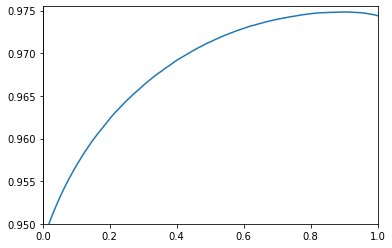

In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from matplotlib import pyplot

x = np.array(list(range(0,1001)))/1000
# Graficar ambas funciones.
pyplot.plot(x, [-1*scalar1(i) for i in x])
# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(0, 1)
pyplot.ylim(0.95, 0.9755)
# Guardar gráfico como imágen PNG.
pyplot.savefig("output.png")
# Mostrarlo.
pyplot.show()

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
        #    df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
train=reduce_mem_usage(train)

Memory usage of dataframe is 1.14 MB
Memory usage after optimization is: 0.23 MB
Decreased by 79.8%


In [0]:
test=reduce_mem_usage(test)

Memory usage of dataframe is 1.25 MB
Memory usage after optimization is: 0.28 MB
Decreased by 77.4%


In [0]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4,random_state=256,shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [1 2 3] TEST: [0]


In [0]:
test_index

array([0])

In [0]:
X[train_index]

array([[1, 2],
       [3, 4]])